Import modules

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
import seaborn as sns
from matplotlib import pyplot as plt

Connect to Google Drive.

In [2]:
drive.mount('/content/drive/')
%cd /content/drive/My Drive/

Mounted at /content/drive/
/content/drive/My Drive


In [4]:
df = pd.read_csv("Emmanuel_Cars.csv")

df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


The fuel, seller_type, transmission, and owner needs to be converted into categorical.

In [6]:
df['fuel'] = df['fuel'].astype('category')
df['seller_type'] = df['seller_type'].astype('category')
df['transmission'] = df['transmission'].astype('category')
df['owner'] = df['owner'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           4340 non-null   object  
 1   year           4340 non-null   int64   
 2   selling_price  4340 non-null   int64   
 3   km_driven      4340 non-null   int64   
 4   fuel           4340 non-null   category
 5   seller_type    4340 non-null   category
 6   transmission   4340 non-null   category
 7   owner          4340 non-null   category
dtypes: category(4), int64(3), object(1)
memory usage: 153.4+ KB


Check for Duplication

In [7]:
df.nunique()

name             1491
year               27
selling_price     445
km_driven         770
fuel                5
seller_type         3
transmission        2
owner               5
dtype: int64

Check for missing data

In [8]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

Since the make and the model are together, it'll be useful to seperate them.

In [9]:
df[['brand', 'model']] = df['name'].str.split(' ', 1, expand=True)
df.head()

<ipython-input-9-9e2121727d19>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['brand', 'model']] = df['name'].str.split(' ', 1, expand=True)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,model
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800 AC
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon R LXI Minor
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna 1.6 SX
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGO T Option
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Amaze VX i-DTEC


In [10]:
df.nunique()

name             1491
year               27
selling_price     445
km_driven         770
fuel                5
seller_type         3
transmission        2
owner               5
brand              29
model            1491
dtype: int64

In [11]:
df['brand'].unique()

array(['Maruti', 'Hyundai', 'Datsun', 'Honda', 'Tata', 'Chevrolet',
       'Toyota', 'Jaguar', 'Mercedes-Benz', 'Audi', 'Skoda', 'Jeep',
       'BMW', 'Mahindra', 'Ford', 'Nissan', 'Renault', 'Fiat',
       'Volkswagen', 'Volvo', 'Mitsubishi', 'Land', 'Daewoo', 'MG',
       'Force', 'Isuzu', 'OpelCorsa', 'Ambassador', 'Kia'], dtype=object)

It seems the spliting resulted in errors in some of the names. I want to explore the suspected errors.

In [12]:
df[df['brand'] == 'Land']

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,model
731,Land Rover Discovery Sport TD4 HSE 7S,2018,4000000,68000,Diesel,Individual,Automatic,First Owner,Land,Rover Discovery Sport TD4 HSE 7S
988,Land Rover Discovery S 2.0 SD4,2018,4000000,68000,Petrol,Individual,Automatic,First Owner,Land,Rover Discovery S 2.0 SD4
1088,Land Rover Discovery Sport SD4 HSE Luxury,2016,3500000,53000,Diesel,Dealer,Automatic,First Owner,Land,Rover Discovery Sport SD4 HSE Luxury
3596,Land Rover Range Rover Evoque 2.2L Dynamic,2012,2349000,149000,Diesel,Individual,Automatic,Second Owner,Land,Rover Range Rover Evoque 2.2L Dynamic
3875,Land Rover Range Rover 4.4 Diesel LWB Vogue SE,2010,4200000,100000,Diesel,Dealer,Automatic,First Owner,Land,Rover Range Rover 4.4 Diesel LWB Vogue SE


The Land Rover needs to be corrected

In [13]:
land_rows = df['brand'] == 'Land'
split_data = df.loc[land_rows, 'name'].str.split(' ', 2, expand=True)

# Combine the first two parts and leave the third part alone
df.loc[land_rows, 'brand'] = split_data[0] + ' ' + split_data[1]
df.loc[land_rows, 'model'] = split_data[2]

df['brand'].unique()

<ipython-input-13-640c3c32fa7e>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  split_data = df.loc[land_rows, 'name'].str.split(' ', 2, expand=True)


array(['Maruti', 'Hyundai', 'Datsun', 'Honda', 'Tata', 'Chevrolet',
       'Toyota', 'Jaguar', 'Mercedes-Benz', 'Audi', 'Skoda', 'Jeep',
       'BMW', 'Mahindra', 'Ford', 'Nissan', 'Renault', 'Fiat',
       'Volkswagen', 'Volvo', 'Mitsubishi', 'Land Rover', 'Daewoo', 'MG',
       'Force', 'Isuzu', 'OpelCorsa', 'Ambassador', 'Kia'], dtype=object)

In [14]:
df['brand'].unique()

array(['Maruti', 'Hyundai', 'Datsun', 'Honda', 'Tata', 'Chevrolet',
       'Toyota', 'Jaguar', 'Mercedes-Benz', 'Audi', 'Skoda', 'Jeep',
       'BMW', 'Mahindra', 'Ford', 'Nissan', 'Renault', 'Fiat',
       'Volkswagen', 'Volvo', 'Mitsubishi', 'Land Rover', 'Daewoo', 'MG',
       'Force', 'Isuzu', 'OpelCorsa', 'Ambassador', 'Kia'], dtype=object)

OpelCorsa is not a brand name, the brand is Opel, which means Corsa is supposed to be part of the model.

In [15]:
opel_rows = df['brand'] == 'OpelCorsa'

df.loc[opel_rows, 'brand'] = 'Opel'
df.loc[opel_rows, 'model'] = df.loc[opel_rows, 'name'].str.split('Opel', expand=True)[1]

In [16]:
df['brand'].unique()

array(['Maruti', 'Hyundai', 'Datsun', 'Honda', 'Tata', 'Chevrolet',
       'Toyota', 'Jaguar', 'Mercedes-Benz', 'Audi', 'Skoda', 'Jeep',
       'BMW', 'Mahindra', 'Ford', 'Nissan', 'Renault', 'Fiat',
       'Volkswagen', 'Volvo', 'Mitsubishi', 'Land Rover', 'Daewoo', 'MG',
       'Force', 'Isuzu', 'Opel', 'Ambassador', 'Kia'], dtype=object)

Checking to see if the data points with Opel as brand

In [17]:
df[df['brand'] == 'Opel']

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,model
2194,OpelCorsa 1.6Gls,2004,142000,73000,Petrol,Individual,Manual,Fourth & Above Owner,Opel,Corsa 1.6Gls
3206,OpelCorsa 1.4 GL,2002,35000,100000,Petrol,Individual,Manual,Third Owner,Opel,Corsa 1.4 GL


Now we can delete the name from the dataframe

In [18]:
df.drop(columns=['name'], inplace=True)
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,model
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800 AC
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon R LXI Minor
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna 1.6 SX
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGO T Option
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Amaze VX i-DTEC


In [19]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
year,4340.0,NaN,NaN,NaN,2013.090783,4.215344,1992.0,2011.0,2014.0,2016.0,2020.0
selling_price,4340.0,NaN,NaN,NaN,504127.311751,578548.736139,20000.0,208749.75,350000.0,600000.0,8900000.0
km_driven,4340.0,NaN,NaN,NaN,66215.777419,46644.102194,1.0,35000.0,60000.0,90000.0,806599.0
fuel,4340,5,Diesel,2153,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_type,4340,3,Individual,3244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmission,4340,2,Manual,3892,NaN,NaN,NaN,NaN,NaN,NaN,NaN
owner,4340,5,First Owner,2832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brand,4340,29,Maruti,1280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,4340,1491,Swift Dzire VDI,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To better explore the data, it'll be better to separate the categorical data from the numerical data.

In [21]:
cat_cols = df.select_dtypes(include=['category']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

Univariate analysis on the numerical data except the selling price.

year
Skew : -0.83


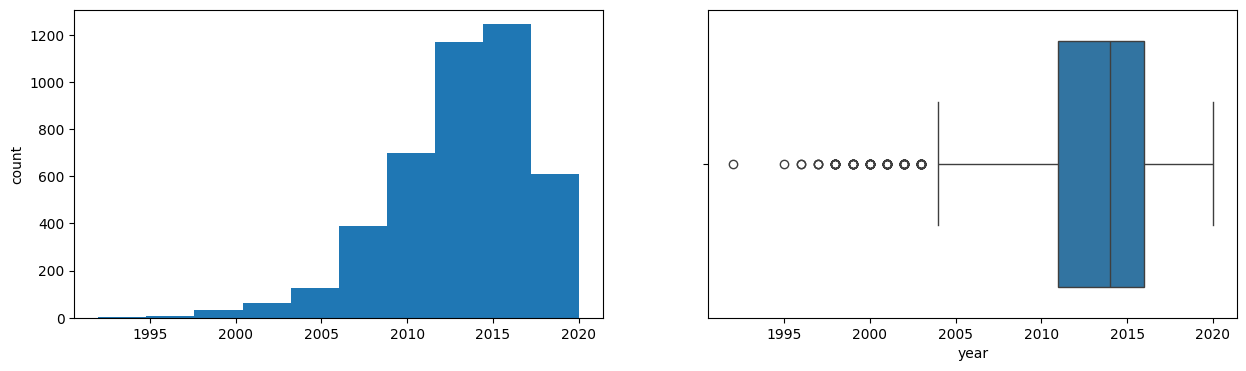

km_driven
Skew : 2.67


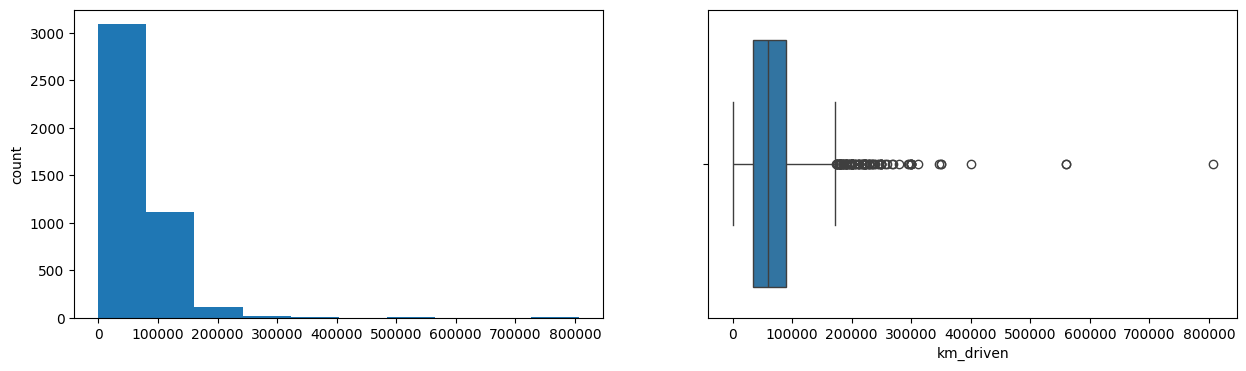

In [22]:
for col in num_cols:
  if col != 'selling_price':
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

The manufacturing year of the cars has it's mean value in 2013 and its skewed towards the left. Most of the cars sold had mileage below 100,000KM.

Multivariate analysis on the numerical data.

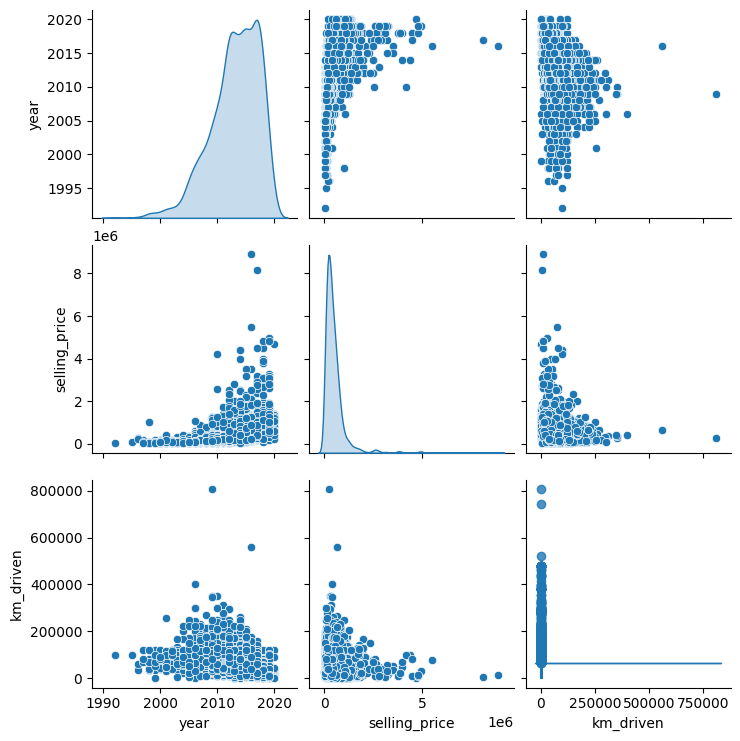

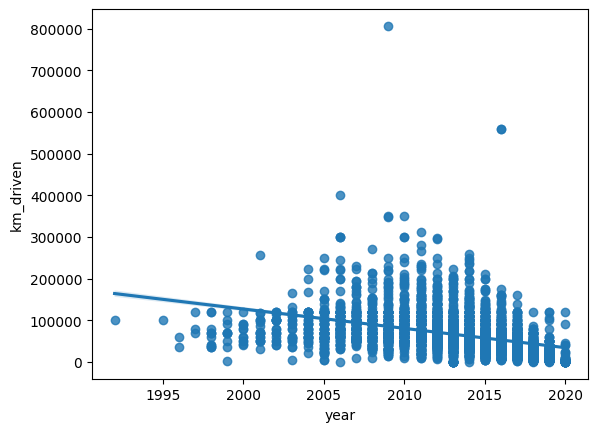

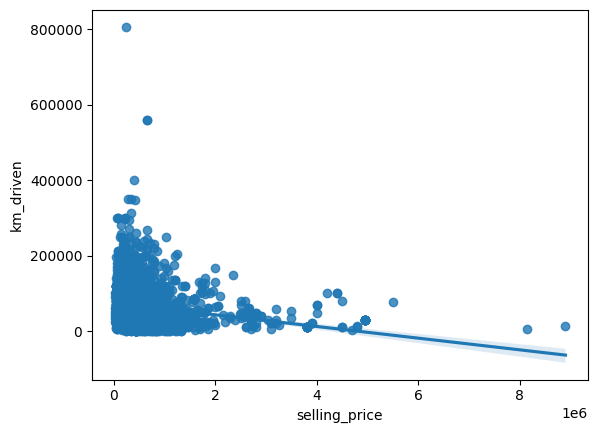

<Axes: >

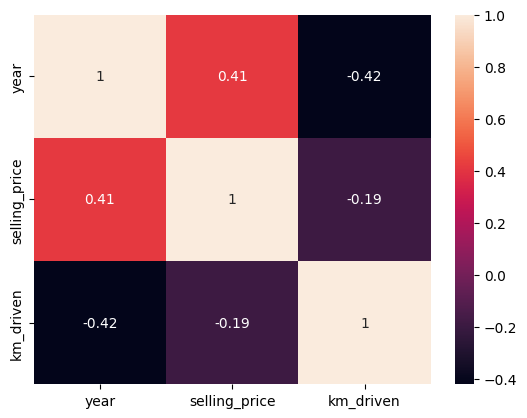

In [31]:
sns.pairplot(df[num_cols], diag_kind='kde')  # KDE plots for diagonal

# Pairwise scatter plots with regression lines
for i in range(len(num_cols)):
  for j in range(i + 1, len(num_cols)):
    col1, col2 = num_cols[i], num_cols[j]
    sns.regplot(x=col1, y=col2, data=df)
    # plt.title(f"{col1} vs {col2}")
    plt.show()

# Correlation matrix with heatmap
sns.heatmap(df[num_cols].corr(), annot=True)

In [34]:
cat_cols

Index(['fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

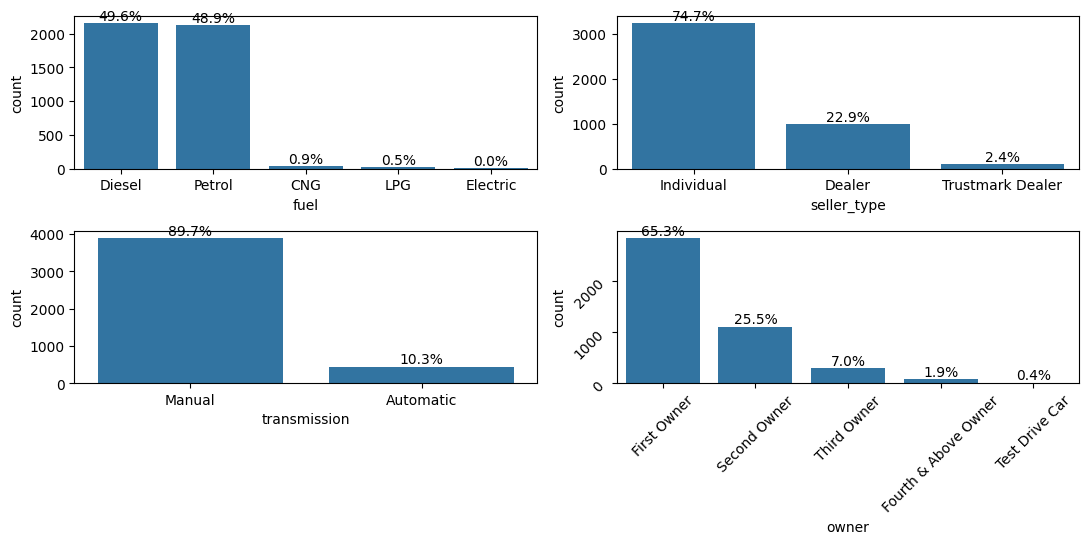

In [35]:
fig, axes = plt.subplots(2, 2, figsize = (11, 6))

def annotate_percentage(ax, total_count):
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

fuel_order = df['fuel'].value_counts().index
seller_type_order = df['seller_type'].value_counts().index
transmission_order = df['transmission'].value_counts().index
owner_order = df['owner'].value_counts().index

sns.countplot(ax=axes[0, 0], x='fuel', data=df, order=fuel_order)
annotate_percentage(axes[0, 0], df['fuel'].count())

sns.countplot(ax=axes[0, 1], x='seller_type', data=df, order=seller_type_order)
annotate_percentage(axes[0, 1], df['seller_type'].count())

sns.countplot(ax=axes[1, 0], x='transmission', data=df, order=transmission_order)
annotate_percentage(axes[1, 0], df['transmission'].count())

sns.countplot(ax=axes[1, 1], x='owner', data=df, order=owner_order)
axes[1, 1].tick_params(labelrotation=45)
annotate_percentage(axes[1, 1], df['owner'].count())

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

There were almost as much Petrol engine cars (48.9%) sold as Diesel engine cars (49.6%). However, majority of the cars sold had manual transmission (89.7%). Majority of the cars were sold to first time owners (65.3%), and majority of the sellers were individuals (74.7%).

The next step is to normalize the selling_price and the	km_driven.

In [36]:
def log_transform(data, col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname + '_log'] = np.log(data[colname]+1)
        else:
            data[colname + '_log'] = np.log(data[colname])
    data.info()

In [37]:
log_transform(df,['km_driven','selling_price'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   year               4340 non-null   int64   
 1   selling_price      4340 non-null   int64   
 2   km_driven          4340 non-null   int64   
 3   fuel               4340 non-null   category
 4   seller_type        4340 non-null   category
 5   transmission       4340 non-null   category
 6   owner              4340 non-null   category
 7   brand              4340 non-null   object  
 8   model              4340 non-null   object  
 9   km_driven_log      4340 non-null   float64 
 10  selling_price_log  4340 non-null   float64 
dtypes: category(4), float64(2), int64(3), object(2)
memory usage: 255.1+ KB


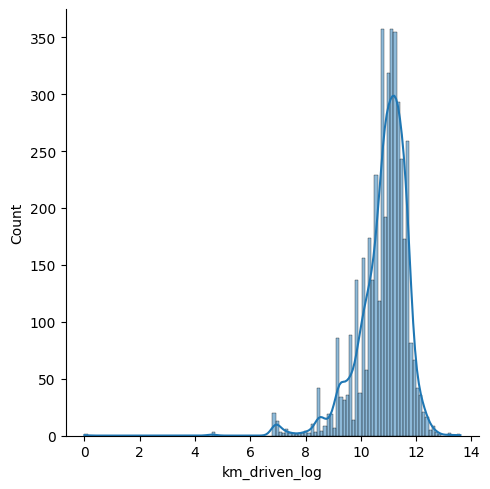

In [38]:
sns.displot(df, x="km_driven_log", kde=True);

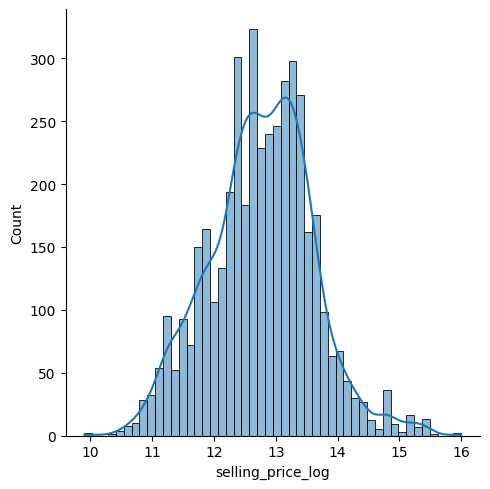

In [39]:
sns.displot(df, x="selling_price_log", kde=True);

<Figure size 1300x1700 with 0 Axes>

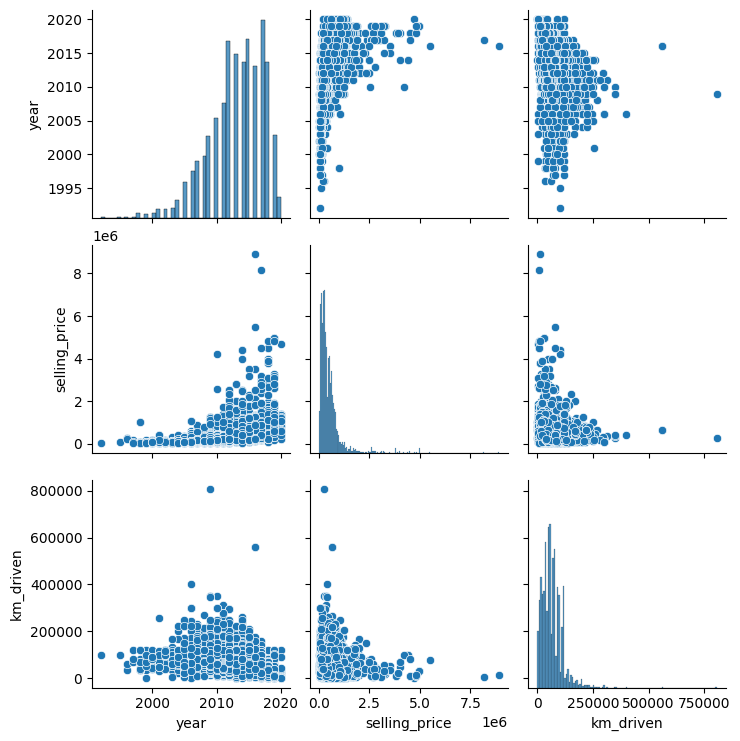

In [40]:
plt.figure(figsize=(13,17))
sns.pairplot(data=df.drop(['km_driven_log','selling_price_log'],axis=1))
plt.show()

*   Selling price is positively correlated with year.
*   Selling Price is negatively correlated with kilometers driven.
* The year of the car doesn't show any linear relationship with the other features



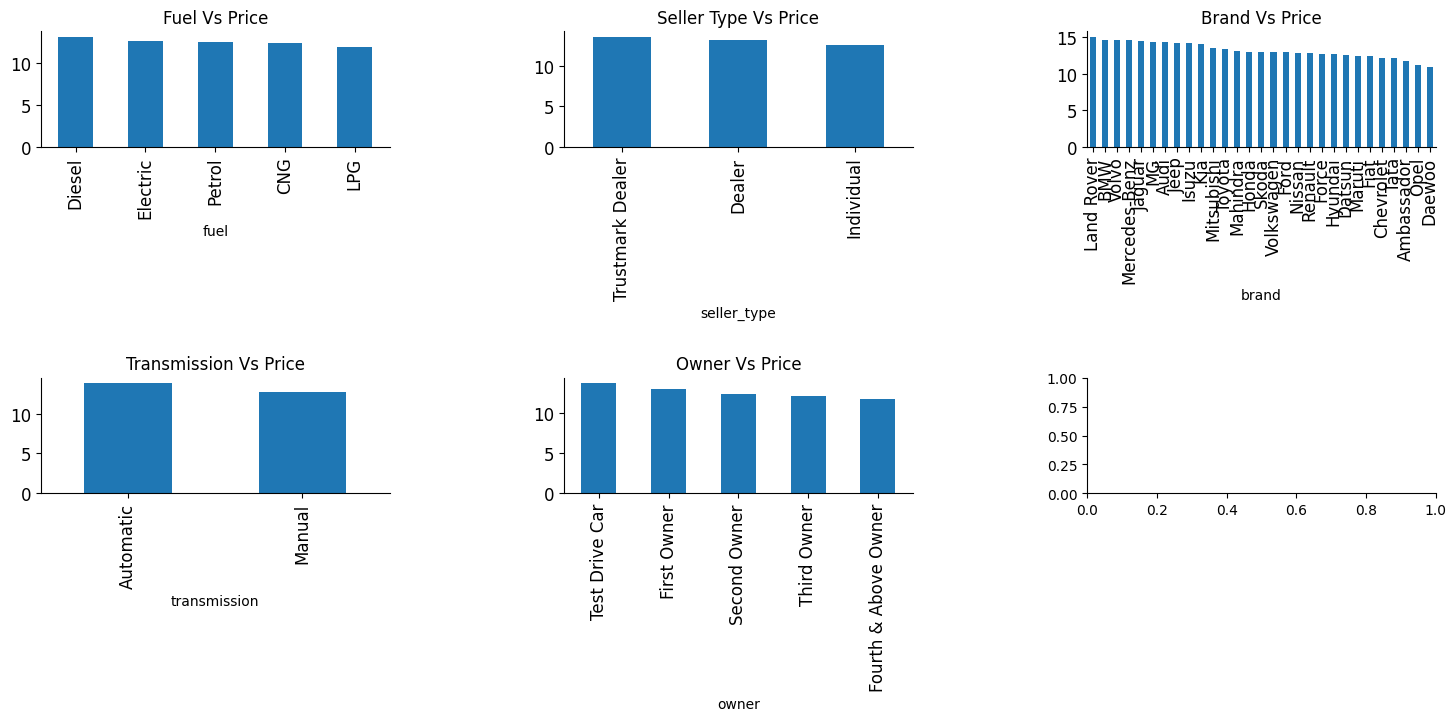

In [41]:
fig, axarr = plt.subplots(2, 3, figsize=(18, 6))

df.groupby('fuel')['selling_price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Fuel Vs Price")

df.groupby('seller_type')['selling_price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Seller Type Vs Price")

df.groupby('transmission')['selling_price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Transmission Vs Price")

df.groupby('owner')['selling_price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("Owner Vs Price")

df.groupby('brand')['selling_price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][2], fontsize=12)
axarr[0][2].set_title("Brand Vs Price")

plt.subplots_adjust(hspace=2.0)
plt.subplots_adjust(wspace=.5)
sns.despine()


* Diesel cars are more expensive.
* Trustmaker dealers sell their cars at an expensive price.
* Automatic transmissions are more expensive.
* Cars that were first test driven are more expensive.

Although the plot of the brands don't look too visible, it's clear that the brand influences the price.

<ipython-input-42-3df673803532>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.drop(['km_driven','selling_price'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)


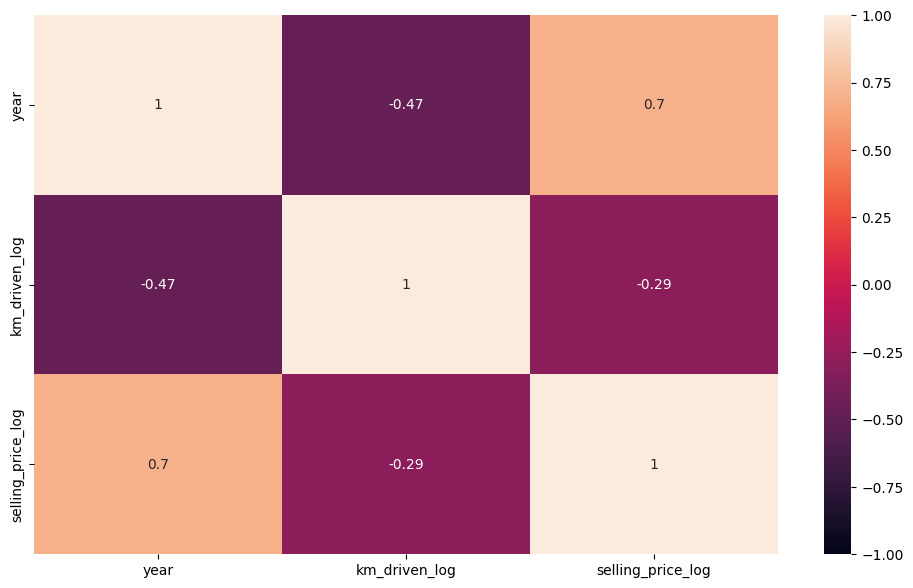

In [42]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.drop(['km_driven','selling_price'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

The target variable in the dataset is the selling_price. And since our expected output is a numerical (continues) value, linear regression will be a good model for this.
The features to be used are: **year**, **selling_price_log**, **km_driven_log**, **fuel**, **seller_type**, **transmission**, **owner**, and **brand**.

We need to encode our data.
For categorical data, we'll use one-hot-encoding.

An we're going to make the asumption that the car brand has a correlation to the price of the car. An so for car brands, we'll use Target Encoding.

We will remove the unused features and split our data into training and test sets.

In [43]:
df.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'brand', 'model', 'km_driven_log',
       'selling_price_log'],
      dtype='object')

In [44]:
data = df.drop(columns=['selling_price', 'km_driven', 'model'])
data.tail()

,year,fuel,seller_type,transmission,owner,brand,km_driven_log,selling_price_log
4335,2014,Diesel,Individual,Manual,Second Owner,Hyundai,11.289782,12.923910
4336,2014,Diesel,Individual,Manual,Second Owner,Hyundai,11.289782,12.923910
4337,2009,Petrol,Individual,Manual,Second Owner,Maruti,11.326596,11.608236
4338,2016,Diesel,Individual,Manual,First Owner,Hyundai,11.407565,13.670485
4339,2016,Petrol,Individual,Manual,First Owner,Renault,10.596635,12.323856


In [45]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.1 MB/s eta 0:00:00


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from category_encoders import TargetEncoder

In [47]:
y = data['selling_price_log']
X = data.drop(['selling_price_log'], axis=1)

Since we don't have too much data, we'll use 80% for training and 20% for testing

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Target encoding for the 'brand' feature
target_encoder = TargetEncoder()
X_train_encoded = target_encoder.fit_transform(X_train['brand'], y_train)
X_test_encoded = target_encoder.transform(X_test['brand'])

In [50]:
# One-hot encoding for the all other features feature
X_train_onehot = pd.get_dummies(X_train.drop(['brand'], axis=1))
X_test_onehot = pd.get_dummies(X_test.drop(['brand'], axis=1))

In [51]:
# Concatenating the encoded features
X_train_final = pd.concat([X_train_encoded, X_train_onehot], axis=1)
X_test_final = pd.concat([X_test_encoded, X_test_onehot], axis=1)

In [52]:
X_train_final.head()

,brand,year,km_driven_log,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
227,13.102819,2017,9.903488,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0
964,12.476077,2018,10.819778,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0
2045,12.476077,2013,10.126631,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0
1025,12.237752,2011,11.156251,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0
4242,12.476077,2017,11.184421,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0


In [53]:
X_train_final.columns

Index(['brand', 'year', 'km_driven_log', 'fuel_CNG', 'fuel_Diesel',
       'fuel_Electric', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Dealer',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Automatic', 'transmission_Manual', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')

# Linear Regression

In [54]:
# Initialize and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train_final, y_train)

LinearRegression()

In [55]:
coefficients = linear_model.coef_
feature_names = X_train_final.columns

coefficients_dict = dict(zip(feature_names, coefficients))
print(coefficients_dict)

{'brand': 0.7002408259224531, 'year': 0.11078563007440595, 'km_driven_log': -0.03648682137702612, 'fuel_CNG': -0.02613514330943769, 'fuel_Diesel': 0.33199549469024703, 'fuel_Electric': -0.09800769807988288, 'fuel_LPG': -0.16636018171365052, 'fuel_Petrol': -0.04149247158727675, 'seller_type_Dealer': -0.12371008110456701, 'seller_type_Individual': -0.20343172207797053, 'seller_type_Trustmark Dealer': 0.3271418031825368, 'transmission_Automatic': 0.2134874281860225, 'transmission_Manual': -0.2134874281860226, 'owner_First Owner': 0.06528480874282881, 'owner_Fourth & Above Owner': -0.051944254738320594, 'owner_Second Owner': 0.020442146320660746, 'owner_Test Drive Car': 0.026254886423337655, 'owner_Third Owner': -0.06003758674850696}


The above data shows the coefficients of each feature in the model.

In [56]:
# Predictions on the test set
predictions = linear_model.predict(X_test_final)

In [57]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score

In [58]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
explained_var = explained_variance_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

In [59]:
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared Score: {r2}')
print(f'Explained Variance Score: {explained_var}')

Mean Squared Error: 0.1667810517175624
Root Mean Squared Error: 0.40838835893982384
Mean Absolute Error: 0.3118482824824292
R-squared Score: 0.7581633725975763
Explained Variance Score: 0.7582690490279214


**Mean Squared Error (MSE):** 0.1668

* This metric measures the average squared difference between the predicted values and the actual values. Lower MSE indicates better performance. In our case, the model makes predictions that are on average squared 0.1668 away from the actual price.

**Root Mean Squared Error (RMSE):** 0.4084

* This is the square root of MSE. It's another way to measure prediction error, but on the same scale as the actual values. A lower RMSE is desirable. Here, the RMSE is 0.4084, which can be interpreted as an average difference of 0.4084 between predicted and actual price.

**Mean Absolute Error (MAE):** 0.3118

* This metric calculates the average of the absolute differences between the predicted and actual values. It's less sensitive to outliers compared to MSE. A lower MAE indicates better performance. In this case, the average absolute difference between predicted and actual price is 0.3118.

**R-squared Score (R²):** 0.7582

* This metric represents the proportion of variance in the dependent variable that can be explained by the independent variable(s) in the model. It ranges from 0 to 1, with higher values indicating a better fit. An R² of 0.7582 suggests that 75.82% of the variance in the actual values can be explained by the predictions of the model.

**Explained Variance Score:** 0.7583

* This metric is very similar to R-squared and provides the same interpretation

In summary, the provided metrics indicate that the model performs well. It has a relatively low MSE, RMSE, and MAE, and a high R² and Explained Variance Score, signifying a good fit between the predicted and actual values.

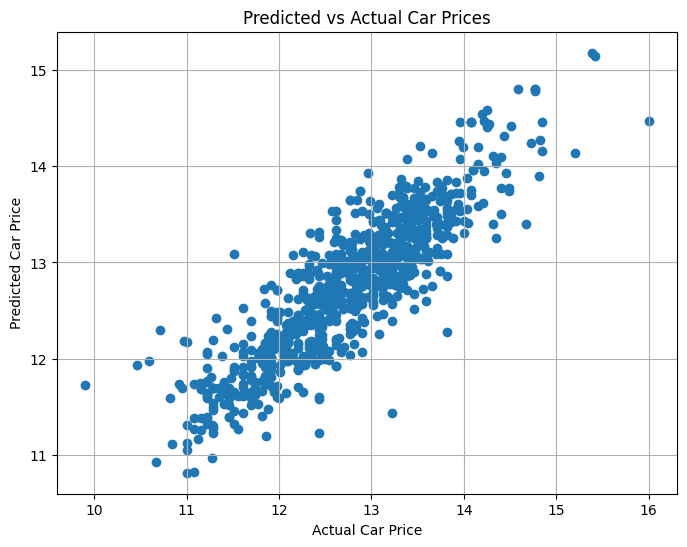

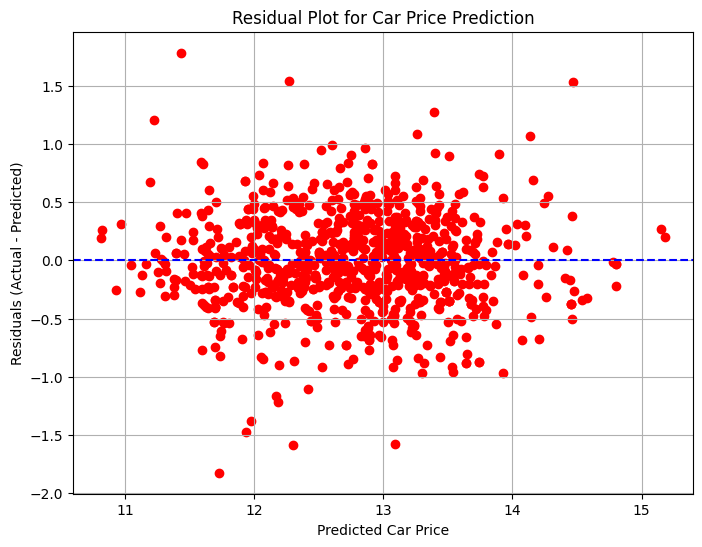

In [60]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Car Price')
plt.ylabel('Predicted Car Price')
plt.title('Predicted vs Actual Car Prices')
plt.grid(True)
plt.show()

# Residual Plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.scatter(predictions, y_test - predictions, color='red')  # Residuals on y-axis
plt.xlabel('Predicted Car Price')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot for Car Price Prediction')
plt.grid(True)
plt.axhline(y=0, color='blue', linestyle='--')  # Horizontal line at y=0
plt.show()



The plots shows that the model is good at predictions.

# Decision tree

In [157]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

from sklearn import tree
from sklearn import metrics

In [158]:
regr = DecisionTreeRegressor(random_state = 100, max_depth=3,max_features=9,min_samples_leaf=3,min_samples_split=5)

In [161]:
model = regr.fit(X_train_final,y_train)

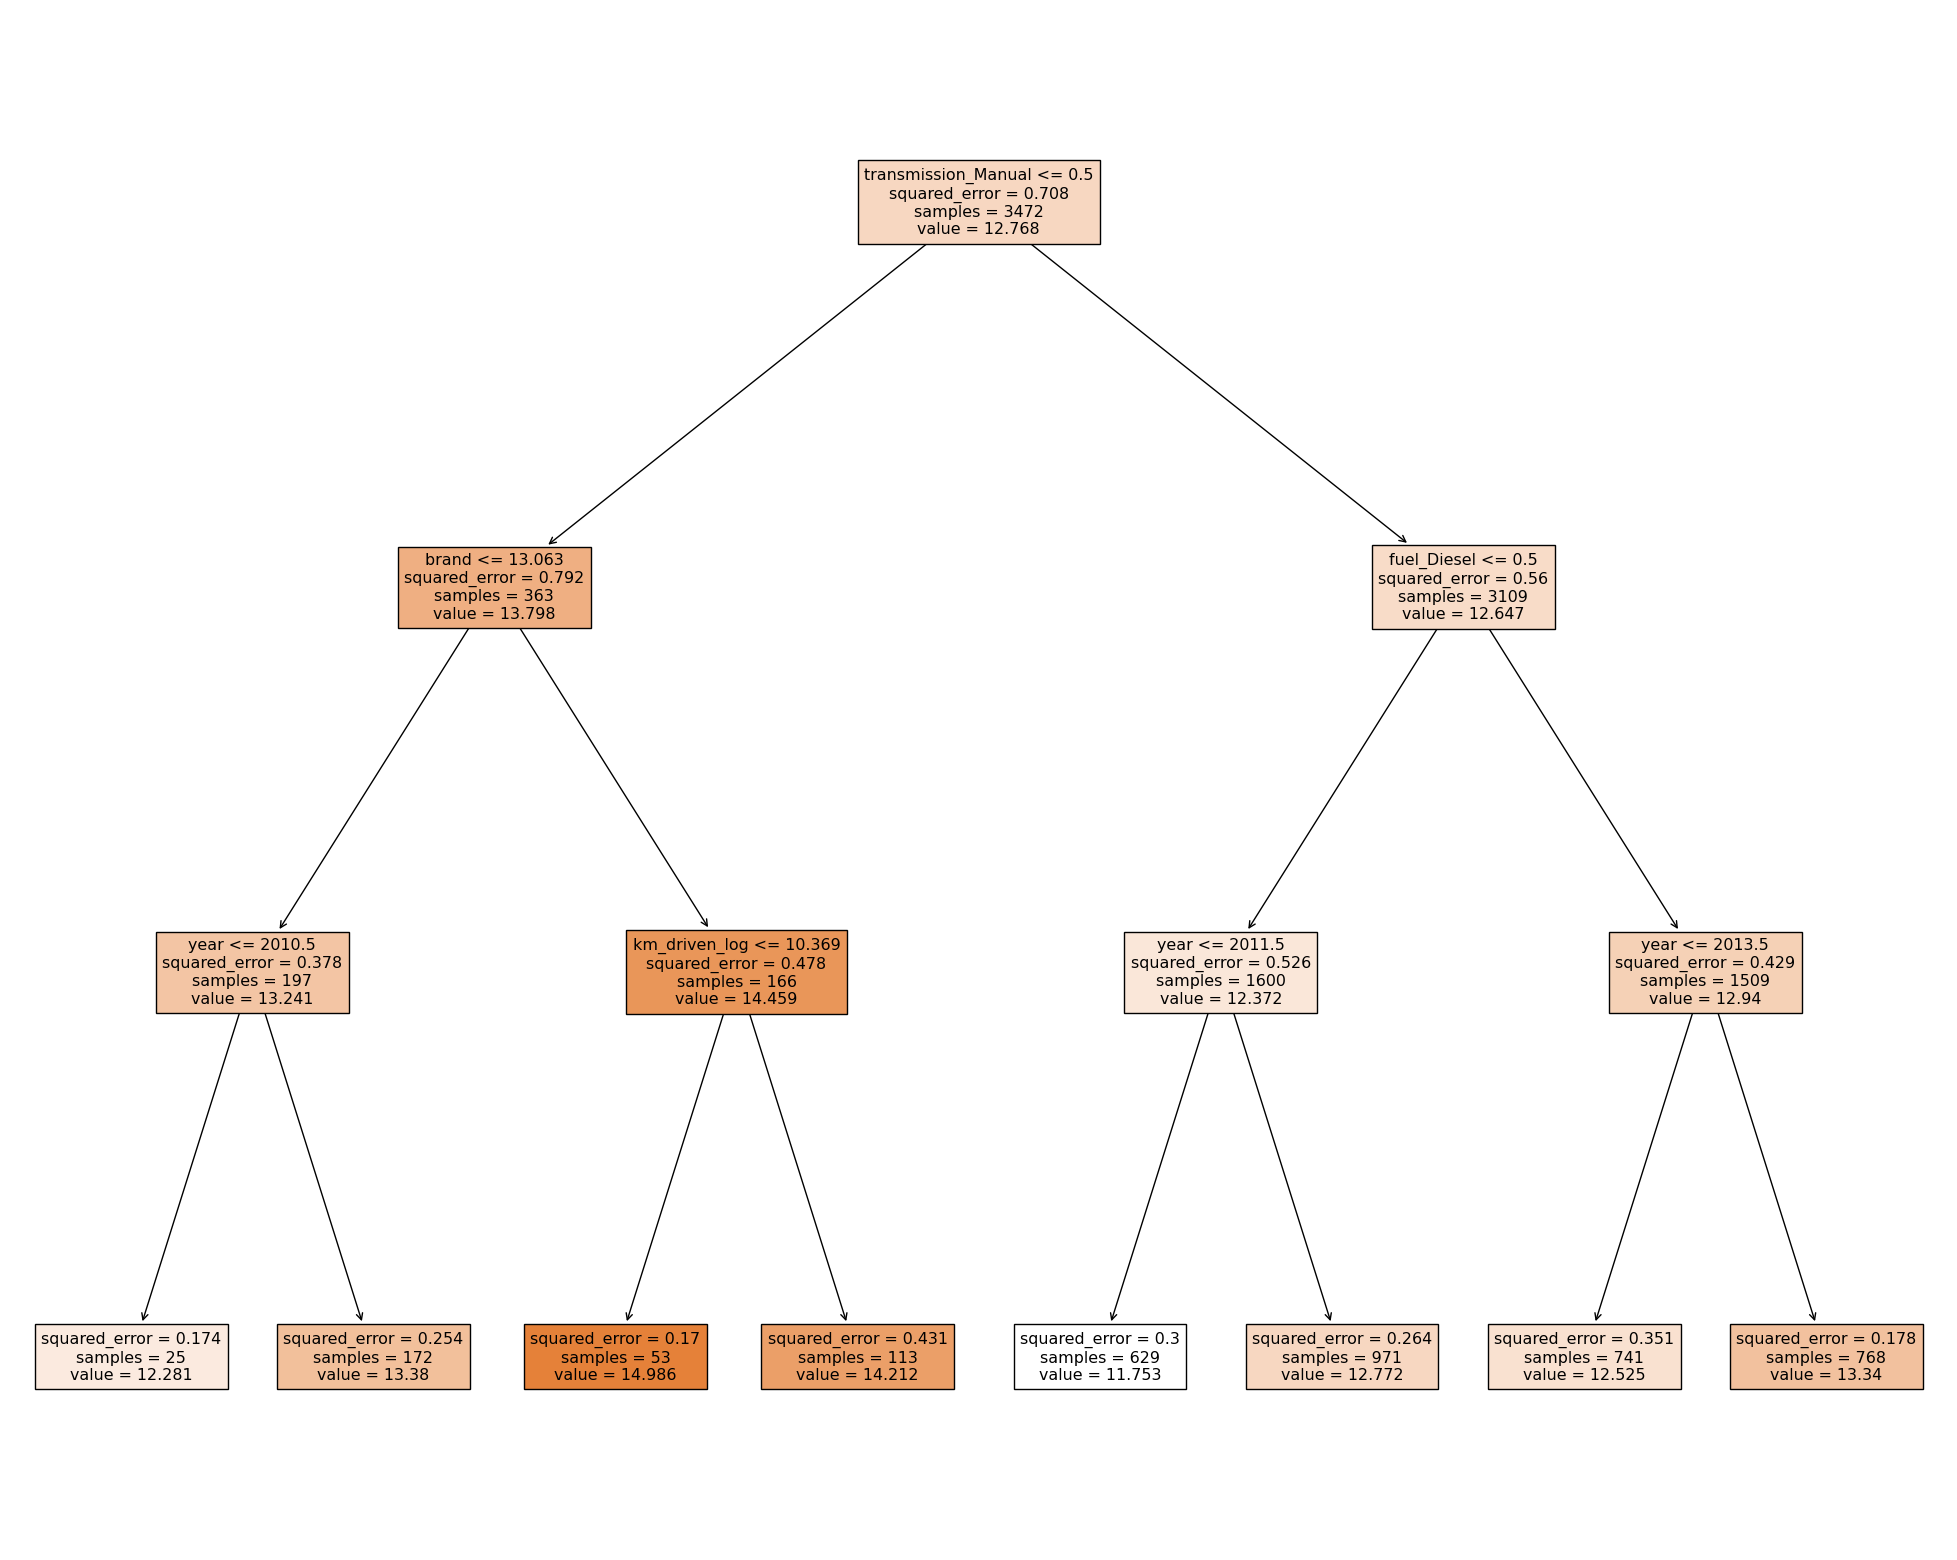

In [162]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr,
                   feature_names=X_train_final.columns,
                   class_names=['selling_price_log'],
                   filled=True)

In [163]:
y_pred = regr.predict(X_test_final)

In [167]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

In [168]:
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared Score: {r2}')
print(f'Explained Variance Score: {explained_var}')

Mean Squared Error: 0.2837209895829222
Root Mean Squared Error: 0.5326546625938068
Mean Absolute Error: 0.4193896222361961
R-squared Score: 0.5885975862521384
Explained Variance Score: 0.5886456242399568


# Random Forest

In [188]:
from sklearn.ensemble import RandomForestRegressor

In [195]:
regr = RandomForestRegressor(random_state=42, n_jobs=3, max_depth=5, oob_score=True)
model = regr.fit(X_train_final,y_train)

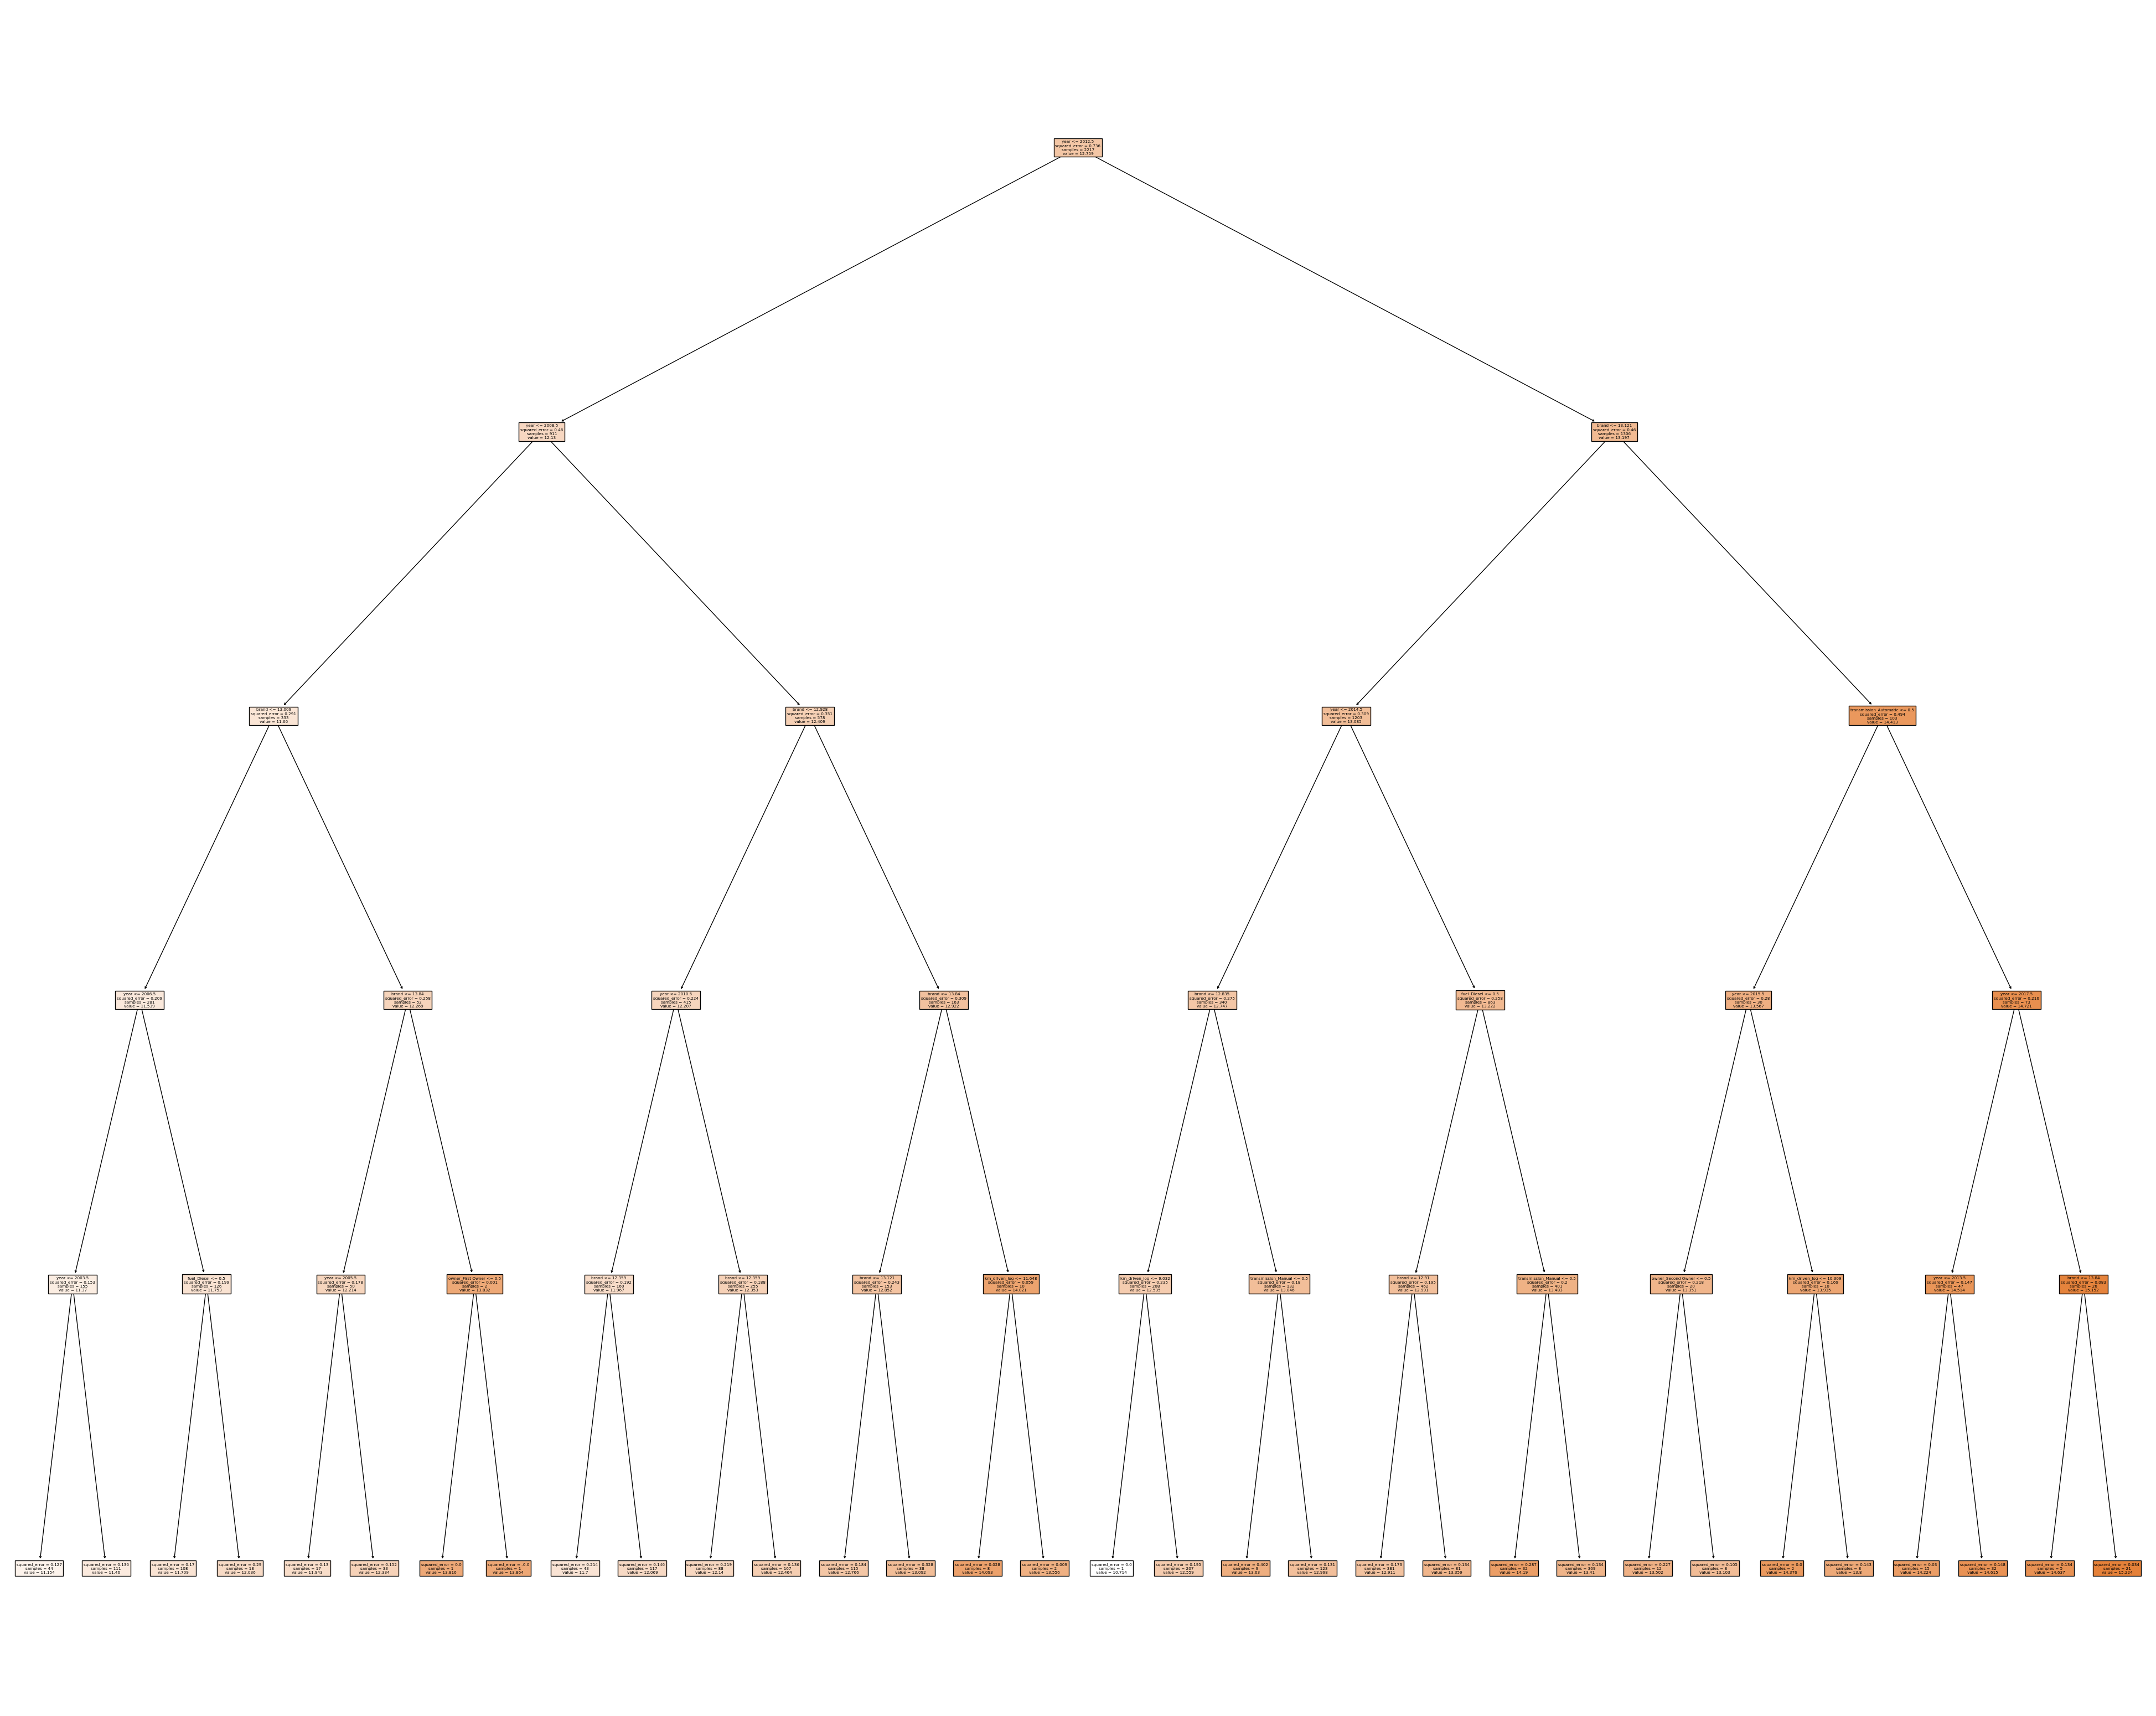

In [196]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,40))
plot_tree(model.estimators_[5], feature_names = X_train_final.columns, class_names=X_train_final.columns,filled=True);

In [197]:
y_pred = regr.predict(X_test_final)

In [198]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

In [199]:
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared Score: {r2}')
print(f'Explained Variance Score: {explained_var}')

Mean Squared Error: 0.16728150932312208
Root Mean Squared Error: 0.40900062264392956
Mean Absolute Error: 0.31340790173012484
R-squared Score: 0.7574376967594636
Explained Variance Score: 0.7575475761505228
